In [1]:
import missingno as msno
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random

def del_same_feature(data):
    '''
    删除方差为0的列（全部相同）
    :param data: 读取的数据集，只含特征，dataframe
    :returns: 清洗后的dataframe
    '''
    # 全类型通用，包括字符串
    data = data.loc[:, (data != data.iloc[0]).any()]
    # 仅适用于数值类型
    #data.drop(data.columns[data.std() == 0], axis=1, inplace=True)
    return data

def del_perc_same_feature(data, threshold):
    '''
    删除相同比列高于阈值的列
    :param data: 读取的数据集，只含特征，dataframe
    :param threshold: 阈值，某个值占比超过阈值的列会被删除
    :return: 清洗后的dataframe
    '''
    # 待删除的列存放
    column_indexs = []
    # 按列遍历dataframe
    for column_index, row_data in data.iteritems():
        counts = row_data.value_counts(normalize=True)
        # 若占比最大的某个值超过阈值，则记入待删除列
        if counts.iloc[0] >= threshold:
            column_indexs.append(column_index)
    data = data.drop(labels=column_indexs, axis=1)
    return data

# setting
file = './dataset/Molecular_Descriptor.xlsx'
data = pd.read_excel(file)
#删掉第一列，分子结构，只保留特征
data = data.iloc[:,1:]
print(data.info)
# [1974 rows x 729 columns]>


# testing
data = del_same_feature(data)
print(data.info)
# [1974 rows x 504 columns]>

data = del_perc_same_feature(data, 0.9)
print(data.info)
# [1974 rows x 362 columns] >

<bound method DataFrame.info of       nAcid   ALogP    ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0 -0.2860  0.081796  126.1188  74.170169          12         12   
1         0 -0.8620  0.743044  131.9420  80.357341          12         12   
2         0  0.7296  0.532316  139.9304  74.064997          18         18   
3         0 -0.3184  0.101379  133.4822  80.357341          12         12   
4         0  1.3551  1.836296  143.1903  76.356583          18         18   
...     ...     ...       ...       ...        ...         ...        ...   
1969      0  1.8193  3.309852  177.6817  89.159790          24         24   
1970      0  1.6903  2.857114  167.6057  82.972618          24         24   
1971      0  1.6903  2.857114  167.6057  82.972618          24         24   
1972      0  1.3365  1.786232  125.5605  63.287860          18         18   
1973      0  1.8193  3.309852  177.6817  89.159790          24         24   

      nAtom  nHeavyAtom  nH  ...          M

In [3]:
def del_std_small_feature(data, threshold):
    '''
    删除方差小于阈值的列
    :param data: 读取的数据集，只含特征，dataframe
    :param threshold: 阈值，方差小于阈值的列会被删除
    :return: 清洗后的dataframe
    '''
    # 待删除的列存放
    column_indexs = []
    # 按列遍历dataframe
    for column_index, row_data in data.iteritems():
        counts = row_data.std()
        # 若占比最大的某个值超过阈值，则记入待删除列
        if counts <= threshold:
            column_indexs.append(column_index)
    data = data.drop(labels=column_indexs, axis=1)
    return data
data = del_std_small_feature(data, 0.05)
data

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,VAdjMat,MW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,26,...,5.954196,439.218115,64.771680,15.471445,8.858910,3.406628,3011,47,4.666,166
1,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.960024,15.486947,8.863774,3.406648,3516,54,5.804,174
2,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,27,...,6.044394,463.181729,68.748923,18.011114,11.390412,3.406644,3542,52,2.964,176
3,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.883696,15.468365,8.857943,3.406624,3594,50,6.015,174
4,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,28,...,6.044394,461.202465,68.883696,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,34,...,6.426265,598.166139,88.709996,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.662088,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.660642,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,1.3365,1.786232,125.5605,63.287860,18,18,51,31,20,24,...,5.954196,436.098059,64.171346,19.841924,16.326873,0.000000,2583,50,0.782,174


['ALogP', 'ALogp2', 'AMR', 'apol', 'ATSc1', 'ATSc2', 'ATSc3', 'ATSc4', 'ATSc5', 'ATSm1', 'ATSm2', 'ATSm3', 'ATSm4', 'ATSm5', 'ATSp1', 'ATSp2', 'ATSp3', 'ATSp4', 'ATSp5', 'BCUTw-1l', 'BCUTw-1h', 'BCUTc-1h', 'BCUTp-1l', 'BCUTp-1h', 'bpol', 'SCH-5', 'SCH-6', 'SCH-7', 'VCH-6', 'VCH-7', 'SC-3', 'SC-4', 'SC-5', 'SC-6', 'VC-3', 'VC-4', 'VC-5', 'SPC-4', 'SPC-5', 'SPC-6', 'VPC-4', 'VPC-5', 'VPC-6', 'SP-0', 'SP-1', 'SP-2', 'SP-3', 'SP-4', 'SP-5', 'SP-6', 'SP-7', 'VP-0', 'VP-1', 'VP-2', 'VP-3', 'VP-4', 'VP-5', 'VP-6', 'VP-7', 'CrippenLogP', 'CrippenMR', 'SHBd', 'SHBa', 'SwHBa', 'SHBint2', 'SHBint3', 'SHBint4', 'SHBint5', 'SHBint6', 'SHBint7', 'SHBint8', 'SHBint9', 'SHBint10', 'SHsOH', 'SHssNH', 'SHdsCH', 'SHaaCH', 'SHCsats', 'SHCsatu', 'SHAvin', 'SHother', 'SsCH3', 'SssCH2', 'SdsCH', 'SaaCH', 'SsssCH', 'SdssC', 'SaasC', 'SaaaC', 'SssssC', 'SssNH', 'SaaN', 'SsssN', 'SsOH', 'SdO', 'SssO', 'SaaO', 'SsF', 'SssS', 'minHBd', 'minHBa', 'minwHBa', 'minHBint2', 'minHBint3', 'minHBint4', 'minHBint5', 'minH

D:\RX-105\math_model_tookits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


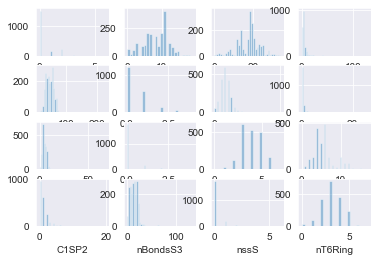

D:\RX-105\math_model_tookits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RX-105\math_model_tookits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RX-105\math_model_tookits\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

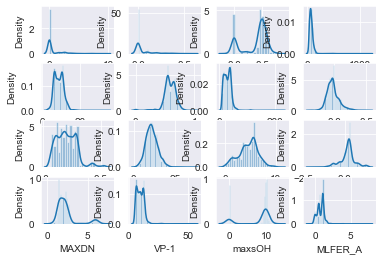

In [4]:
def draw_feature(data):
    # 遍历每列的类型
    columns_int = []
    columns_float = []
    for column_index in data.columns:
        if str(type(data[column_index][0])) == "<class 'numpy.int64'>":
            columns_int.append(column_index)
        if str(type(data[column_index][0])) == "<class 'numpy.float64'>":
            columns_float.append(column_index)
    print(columns_float)
    print(columns_int)
    # 随机选择16个做分布图
    columns_int_samples = random.sample(columns_int, 16)
    columns_float_samples = random.sample(columns_float, 16)
    data = data.dropna()
    for i in range(1,17):
        plt.subplot(4,4,i)
        sns.distplot(data[columns_int_samples[i-1]], kde=False, hist=True)
    # plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    for i in range(1,17):
        plt.subplot(4,4,i)
        sns.distplot(data[columns_float_samples[i-1]], hist=True, norm_hist=False)
    # plt.subplots_adjust(wspace=10, hspace=10)
    plt.show()

draw_feature(data)